<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Visualize_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install wget
import wget
import keras
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot
from PIL import Image
import numpy as np

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
model = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 6s 0us/step


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
test_layer = model.layers[1]

In [0]:
test_layer.name, test_layer.input, test_layer.output, test_layer.get_config()

('block1_conv1',
 <tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 {'activation': 'relu',
  'activity_regularizer': None,
  'bias_constraint': None,
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'bias_regularizer': None,
  'data_format': 'channels_last',
  'dilation_rate': (1, 1),
  'filters': 64,
  'kernel_constraint': None,
  'kernel_initializer': {'class_name': 'VarianceScaling',
   'config': {'distribution': 'uniform',
    'mode': 'fan_avg',
    'scale': 1.0,
    'seed': None}},
  'kernel_regularizer': None,
  'kernel_size': (3, 3),
  'name': 'block1_conv1',
  'padding': 'same',
  'strides': (1, 1),
  'trainable': True,
  'use_bias': True})

In [0]:
len(test_layer.get_weights())

2

In [0]:
test_layer.get_weights()[0].shape, test_layer.get_weights()[1].shape

((3, 3, 3, 64), (64,))

In [0]:
model.layers[2].get_weights()[0].shape, model.layers[2].get_weights()[1].shape

((3, 3, 64, 64), (64,))

In [0]:
[(i, i.name) for i in model.layers] #Get all the conv layers   # NOTE CONV has 2 weights one for filters and one for bias

[(<keras.engine.input_layer.InputLayer at 0x7f3936624710>, 'input_1'),
 (<keras.layers.convolutional.Conv2D at 0x7f3936624780>, 'block1_conv1'),
 (<keras.layers.convolutional.Conv2D at 0x7f3936624dd8>, 'block1_conv2'),
 (<keras.layers.pooling.MaxPooling2D at 0x7f39365d2f98>, 'block1_pool'),
 (<keras.layers.convolutional.Conv2D at 0x7f39365d2dd8>, 'block2_conv1'),
 (<keras.layers.convolutional.Conv2D at 0x7f3936544d68>, 'block2_conv2'),
 (<keras.layers.pooling.MaxPooling2D at 0x7f393656b668>, 'block2_pool'),
 (<keras.layers.convolutional.Conv2D at 0x7f393656b198>, 'block3_conv1'),
 (<keras.layers.convolutional.Conv2D at 0x7f393659b320>, 'block3_conv2'),
 (<keras.layers.convolutional.Conv2D at 0x7f3935cf0940>, 'block3_conv3'),
 (<keras.layers.pooling.MaxPooling2D at 0x7f3935d08fd0>, 'block3_pool'),
 (<keras.layers.convolutional.Conv2D at 0x7f3935d08978>, 'block4_conv1'),
 (<keras.layers.convolutional.Conv2D at 0x7f3935cb3ba8>, 'block4_conv2'),
 (<keras.layers.convolutional.Conv2D at 0x7f

In [0]:
for layer in model.layers:
  if "conv" in layer.name:
    print(layer.name)

block1_conv1
block1_conv2
block2_conv1
block2_conv2
block3_conv1
block3_conv2
block3_conv3
block4_conv1
block4_conv2
block4_conv3
block5_conv1
block5_conv2
block5_conv3


In [0]:
for layer in model.layers:
  if "conv" in layer.name:
    filter, bais = layer.get_weights()
    print(layer.name, filter.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [0]:
filter.max(), filter.min()

(0.28699666, -0.09288482)

In [0]:
# Normalize the filter in range of 0 - 1
normalized_filter = (filter - filter.min()) / (filter.max() - filter.min())

In [0]:
def get_intermediate_result(image_path, layer_num):
  if image_path is None:
    image_path = wget.download("https://d1ia71hq4oe7pn.cloudfront.net/og/75335251-1200px.jpg")
  image = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
  image = keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)
  image = keras.applications.vgg16.preprocess_input(image)
  print(model.layers[layer_num].name)
  _model = keras.models.Model(input=model.inputs, outputs=model.layers[layer_num].output)
  result = _model.predict(image)
  return result

In [0]:
#! wget https://d1ia71hq4oe7pn.cloudfront.net/og/75335251-1200px.jpg

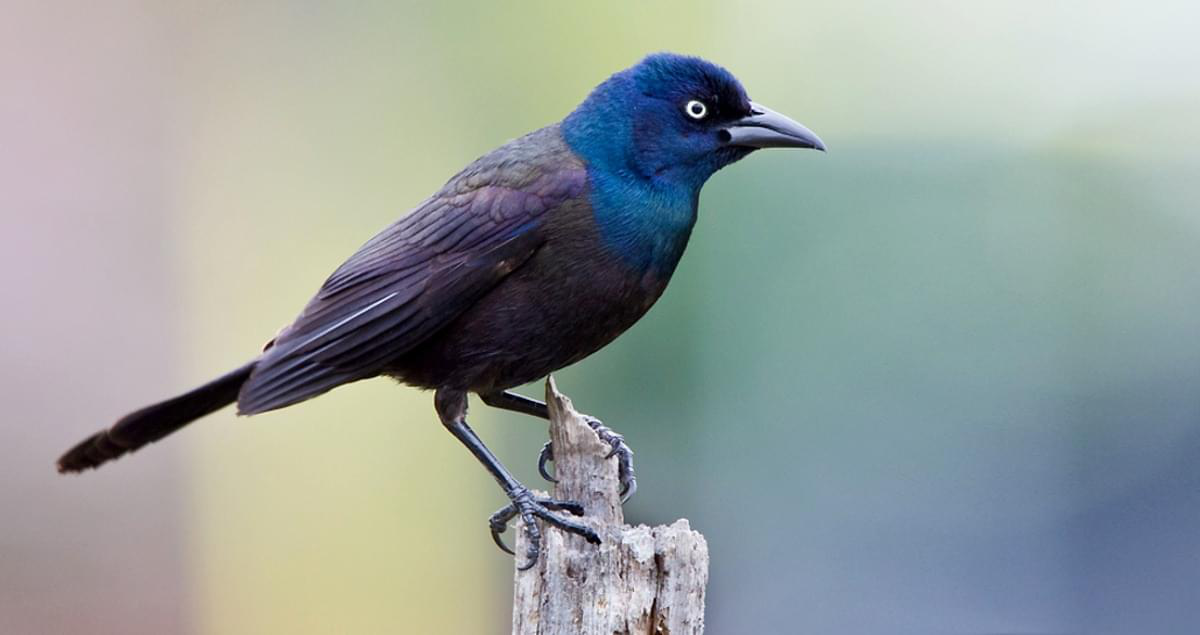

In [0]:
Image.open("75335251-1200px.jpg")

In [0]:
result = get_intermediate_result("75335251-1200px.jpg", layer_num=1)
result.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  


(1, 224, 224, 64)

In [0]:
def plot(result):
  print(result.shape)
  shape = result.shape[-1]
  cols = 8 
  rows = int(np.ceil(shape / cols)) 
  if rows < 10:
    fig, ax = plt.subplots(rows, cols, figsize=(rows*2.5, cols*2))
  else:
    fig, ax = plt.subplots(rows, cols, figsize=(rows*2, cols*2))
  i = 1
  for r in range(0, rows):
    for c in range(0, cols):
      ax[r][c].imshow(result[0,:,:,i-1], cmap="gray")
      i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  


(1, 224, 224, 64)


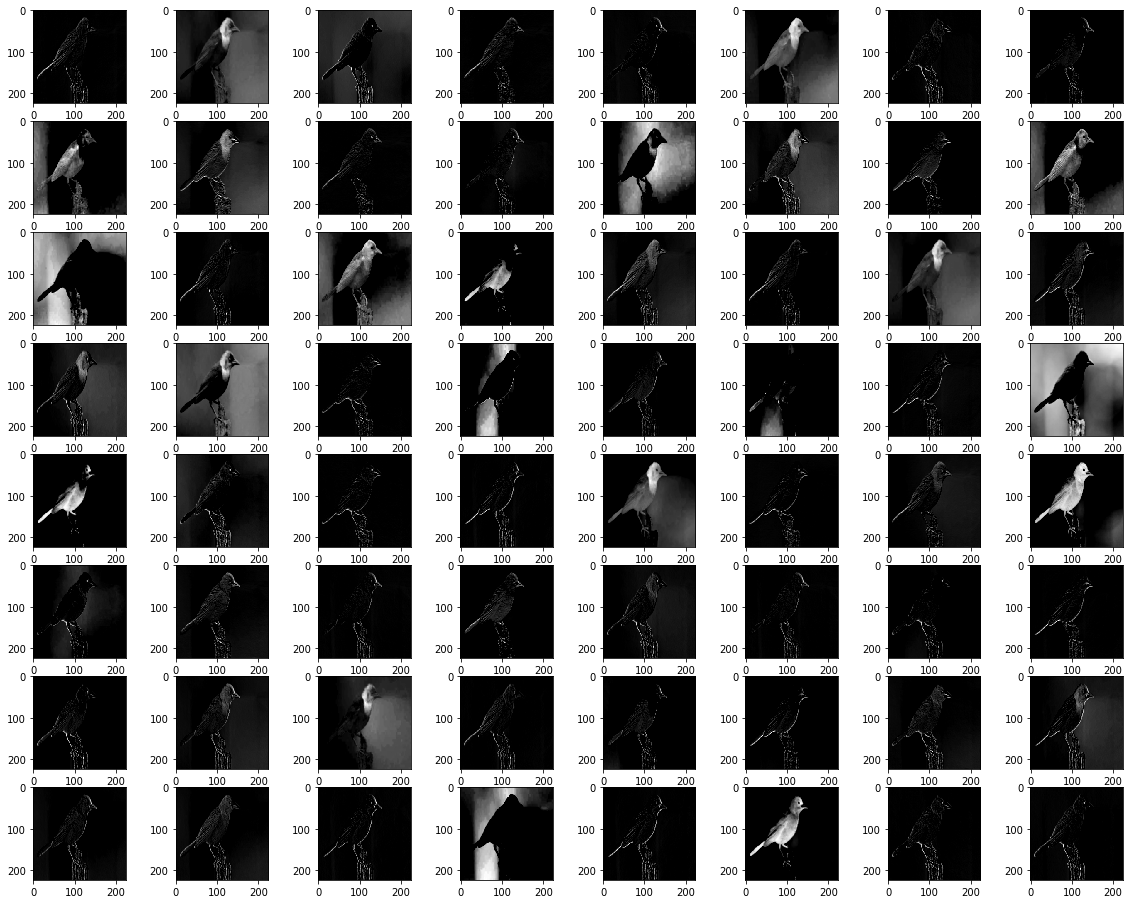

In [0]:
plot(result=get_intermediate_result(None, layer_num=1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  


(1, 224, 224, 64)


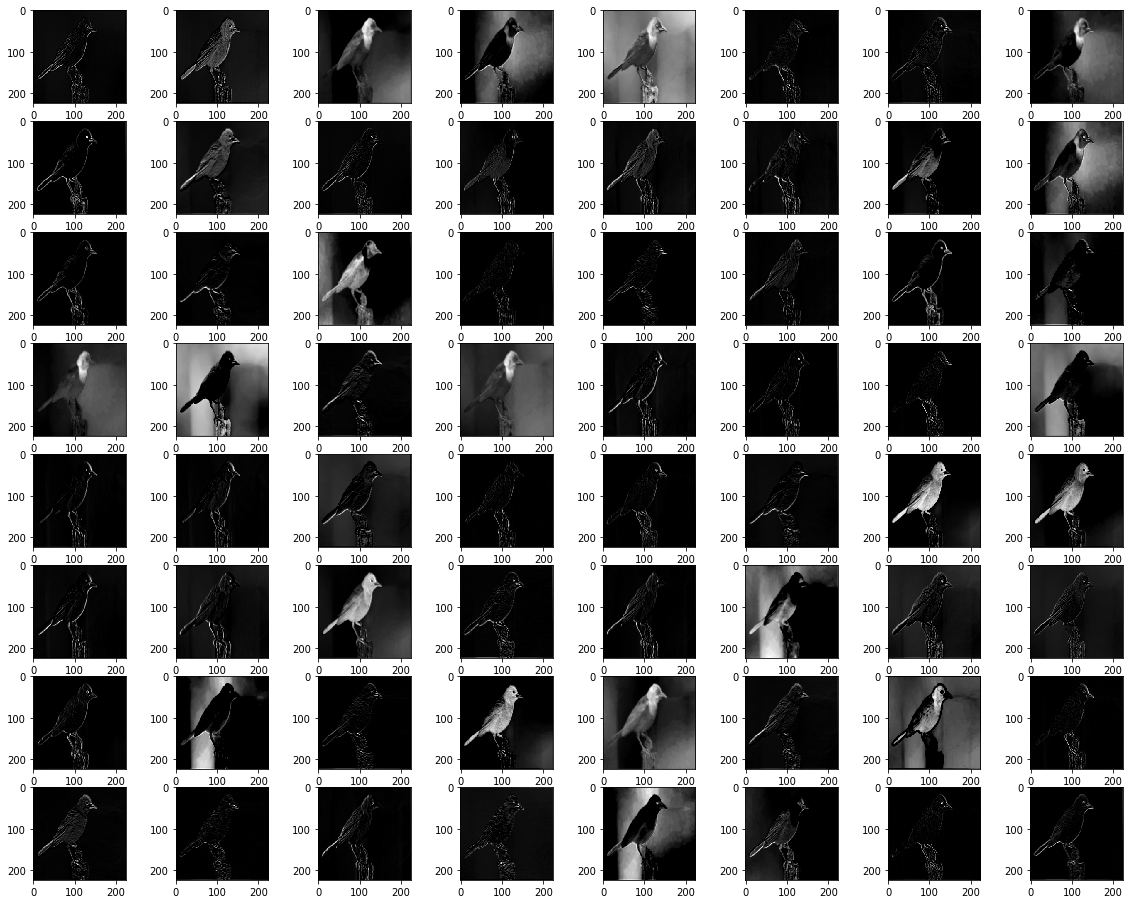

In [0]:
plot(result=get_intermediate_result(None, layer_num=2))

block1_pool
(1, 112, 112, 64)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


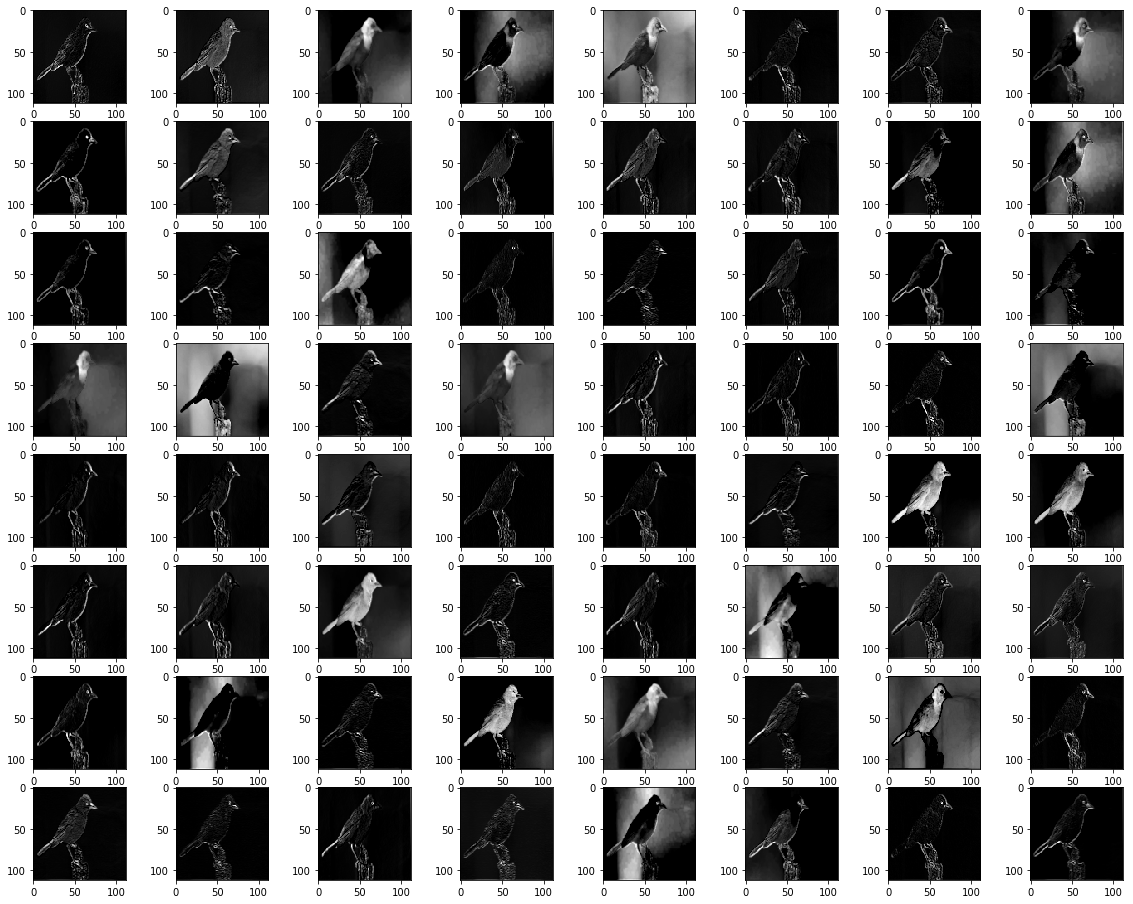

In [0]:
plot(result=get_intermediate_result(None, layer_num=3))

block2_conv1
(1, 112, 112, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


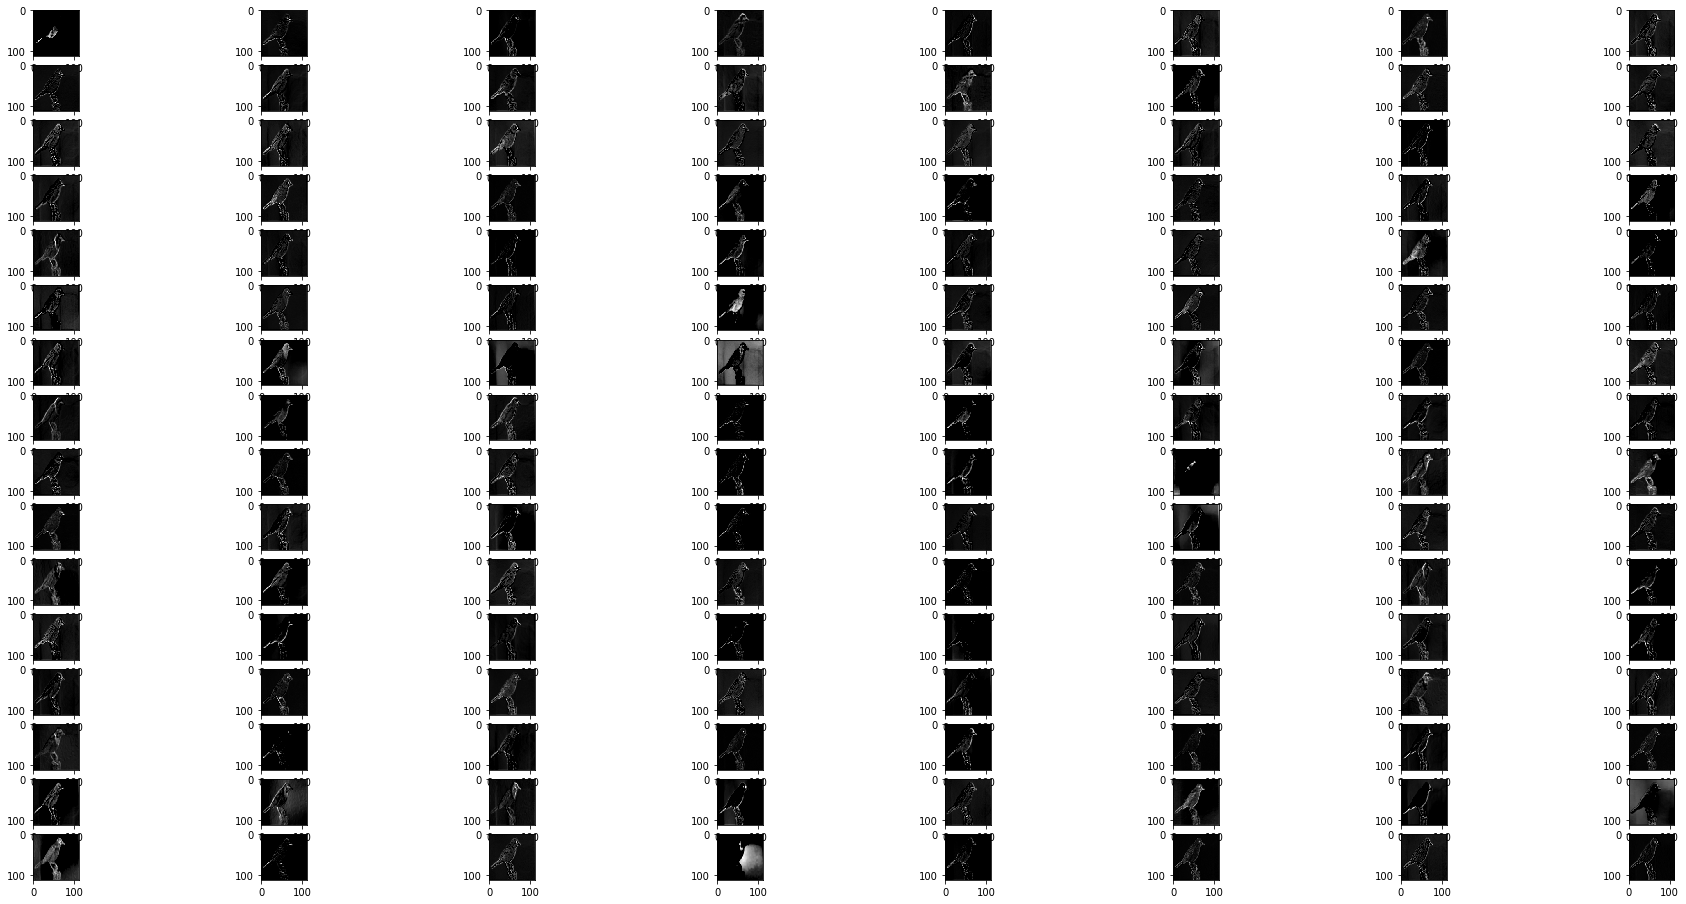

In [0]:
plot(result=get_intermediate_result(None, layer_num=4))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  


(1, 112, 112, 128)


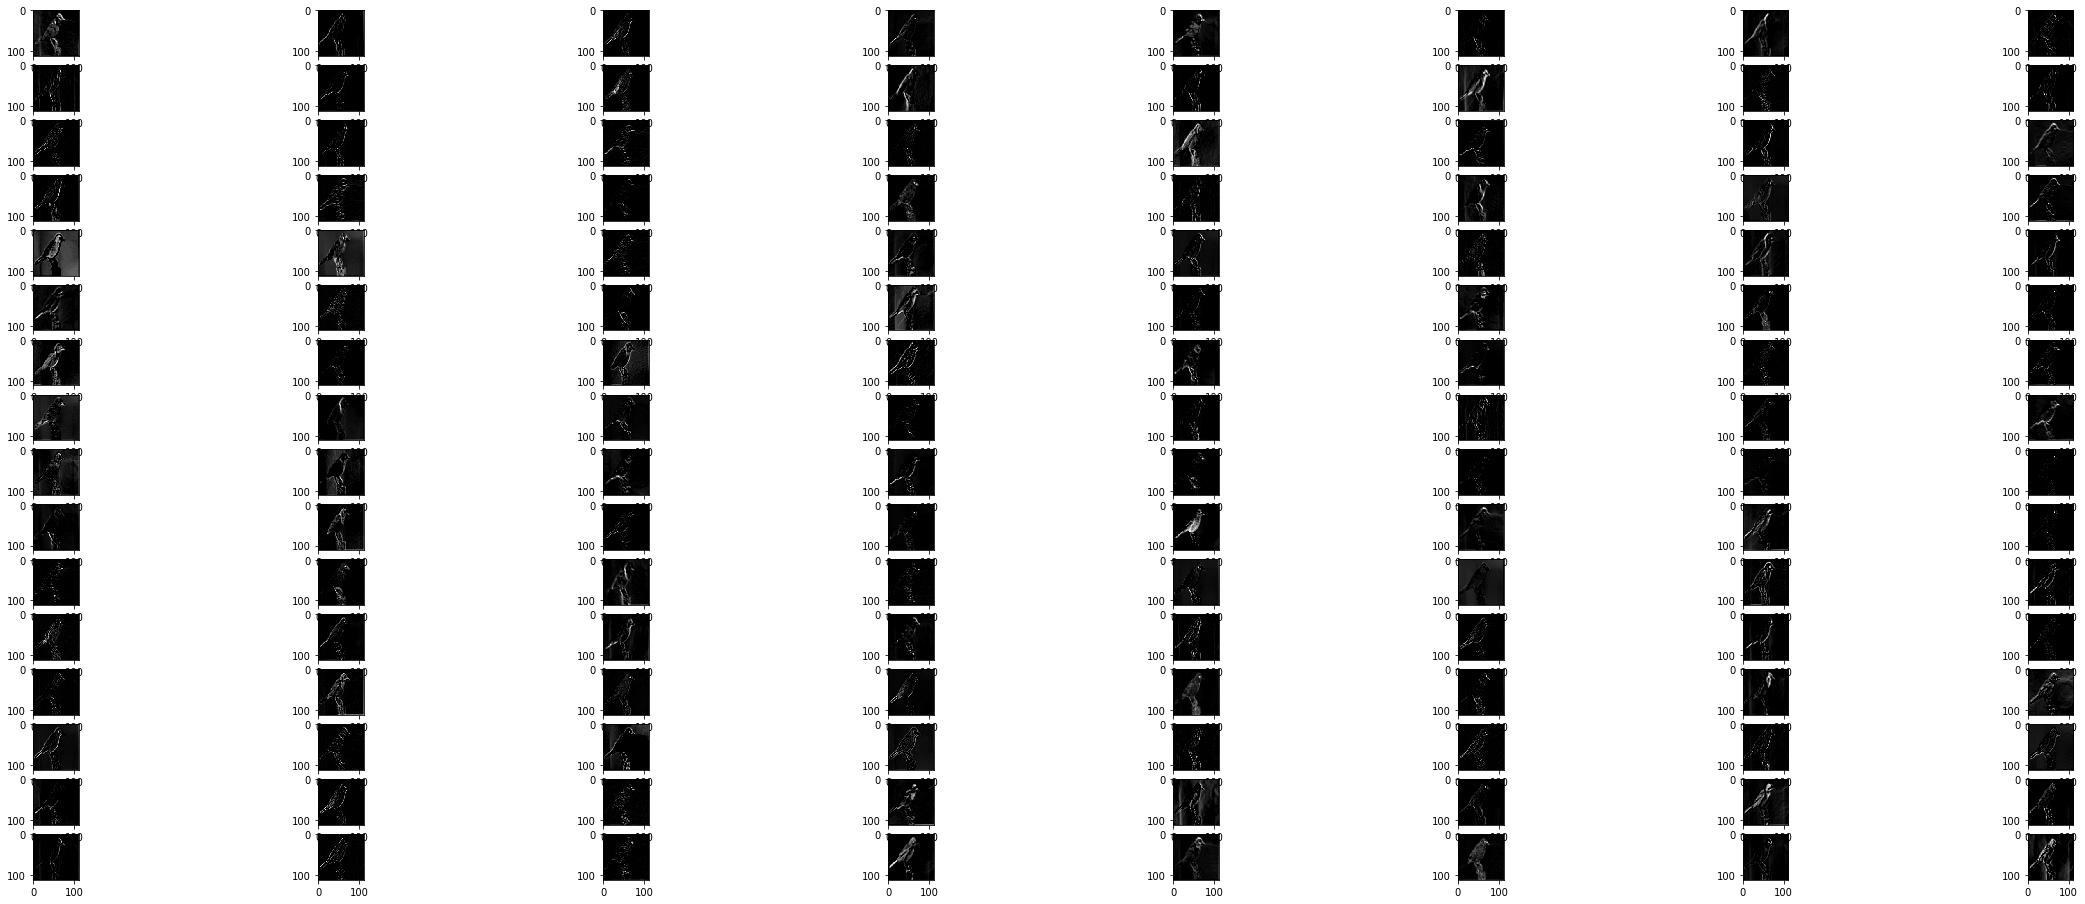

In [0]:
plot(result=get_intermediate_result(None, layer_num=5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  


(1, 56, 56, 128)


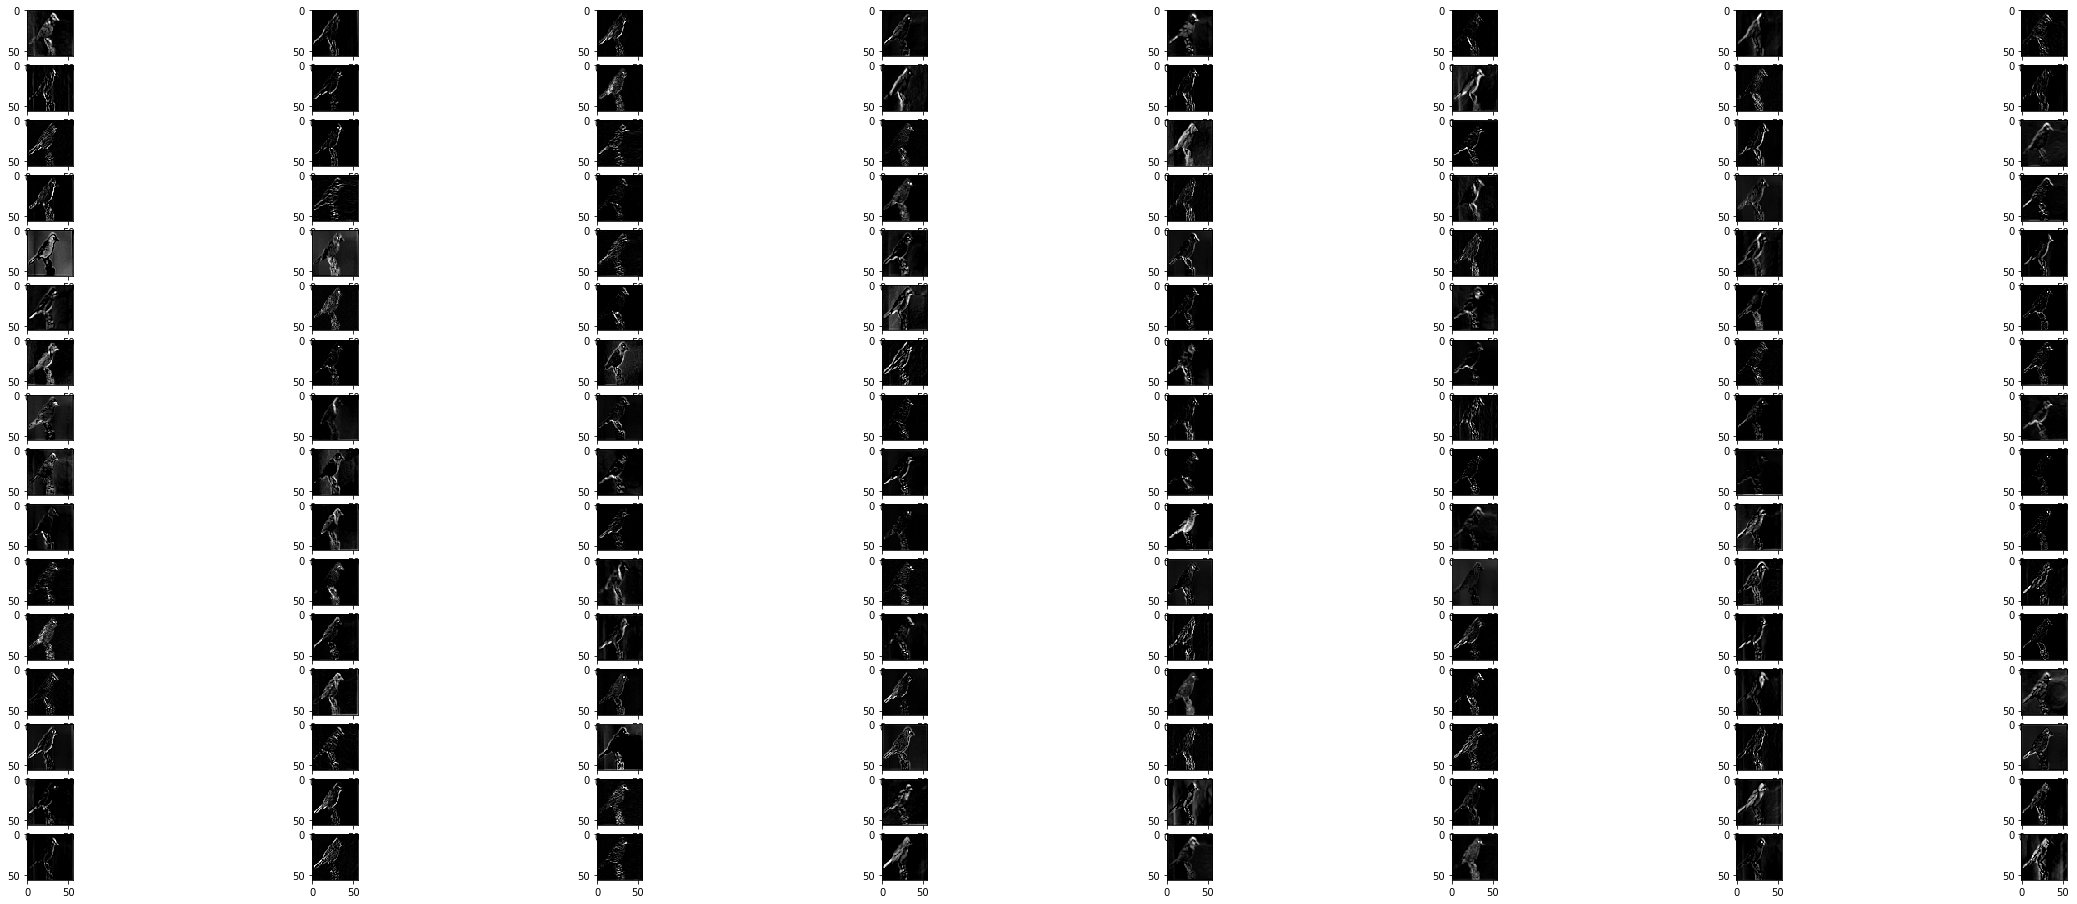

In [0]:
plot(result=get_intermediate_result(None, layer_num=6))

block3_conv1
(1, 56, 56, 256)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("bl..., inputs=[<tf.Tenso...)`
  if __name__ == '__main__':


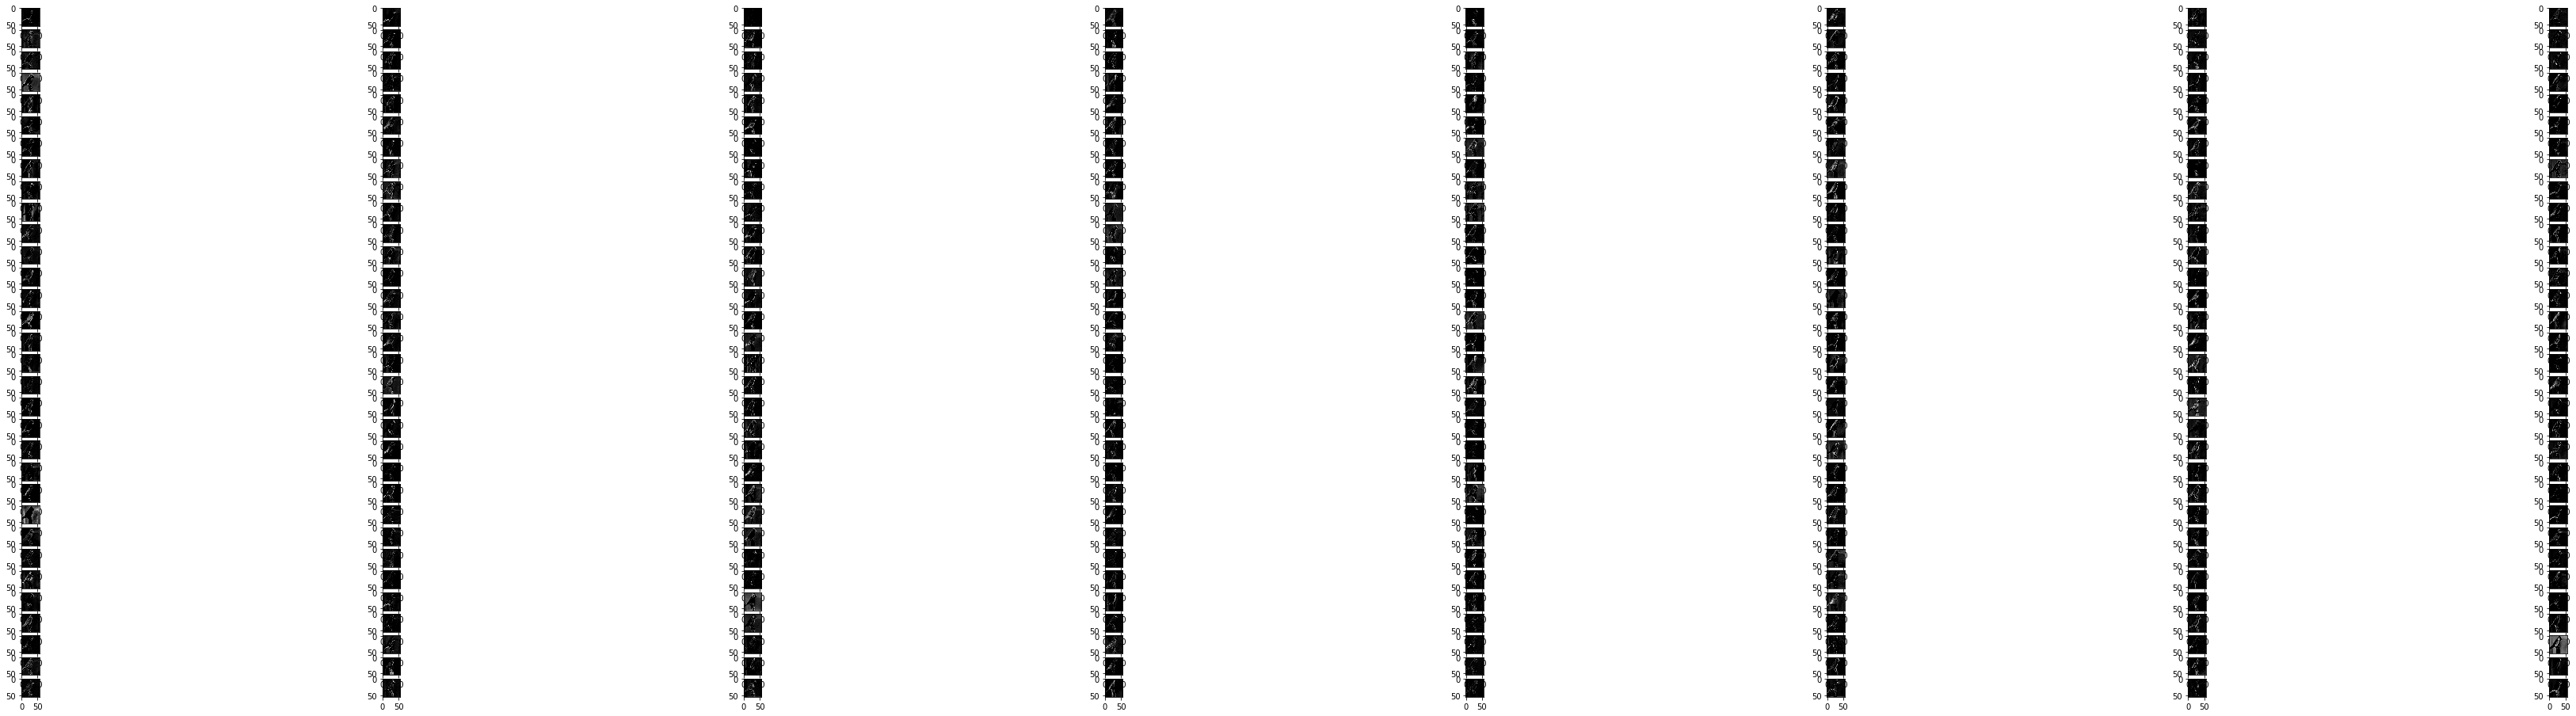

In [0]:
plot(result=get_intermediate_result(None, layer_num=7))